In [32]:
import pandas as pd

# Daten einlesen
# Destatis_Schutzsuchende_12531-0023 
# ACHTUNG: Ländergruppierungen_Label 'insgesamt' sind die korrekten Werte. Die Ländergruppierungen überschneiden sich.
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Schutzsuchende_12531-0023_aufbereitet.csv"
df = pd.read_csv(url)

df.head()

,Bundesland_Code,Bundesland,Alter,Ländergruppierungen_Code,Ländergruppierungen_Label,Migrantengeneration,Geschlecht,Anzahl,Schutzsuchende
0,3,Niedersachsen,65-Jährige,LDR-GASTARB,Gastarbeiterländer,1. Generation (Geburt im Ausland),männlich,110,Schutzsuchende
1,5,Nordrhein-Westfalen,43-Jährige,DRITT-EU-28,Drittstaaten zu EU-28 (bis 31.01.2020),2. Generation (Geburt in Deutschland),weiblich,10,Schutzsuchende
2,11,Berlin,11-Jährige,LDR-GASTARB,Gastarbeiterländer,1. Generation (Geburt im Ausland),männlich,80,Schutzsuchende
3,5,Nordrhein-Westfalen,68-Jährige,DRITT-EU-27,Drittstaaten zu EU-27 (bis 30.06.2013),2. Generation (Geburt in Deutschland),männlich,10,Schutzsuchende
4,10,Saarland,12-Jährige,DRITT-EU-27-1,Drittstaaten zu EU-27 (seit 01.02.2020),1. Generation (Geburt im Ausland),männlich,485,Schutzsuchende


In [33]:
# Erstellen der neuen Spalte 'Migrantengeneration_Code'
df['Migrantengeneration_Code'] = df['Migrantengeneration'].map({
    "2. Generation (Geburt in Deutschland)": 2,
    "1. Generation (Geburt im Ausland)": 1
})

In [34]:
schutzsuchende_gesamt = df[df["Ländergruppierungen_Label"] == "Insgesamt"]

schutzsuchende_gesamt.head()

,Bundesland_Code,Bundesland,Alter,Ländergruppierungen_Code,Ländergruppierungen_Label,Migrantengeneration,Geschlecht,Anzahl,Schutzsuchende,Migrantengeneration_Code
6,10,Saarland,1-Jährige,NaN,Insgesamt,2. Generation (Geburt in Deutschland),männlich,215,Schutzsuchende,2
33,12,Brandenburg,30-Jährige,NaN,Insgesamt,2. Generation (Geburt in Deutschland),männlich,5,Schutzsuchende,2
81,5,Nordrhein-Westfalen,1-Jährige,NaN,Insgesamt,2. Generation (Geburt in Deutschland),männlich,3245,Schutzsuchende,2
105,8,Baden-Württemberg,56-Jährige,NaN,Insgesamt,1. Generation (Geburt im Ausland),weiblich,1440,Schutzsuchende,1
118,15,Sachsen-Anhalt,85-Jährige,NaN,Insgesamt,1. Generation (Geburt im Ausland),weiblich,45,Schutzsuchende,1


<Figure size 1000x600 with 0 Axes>

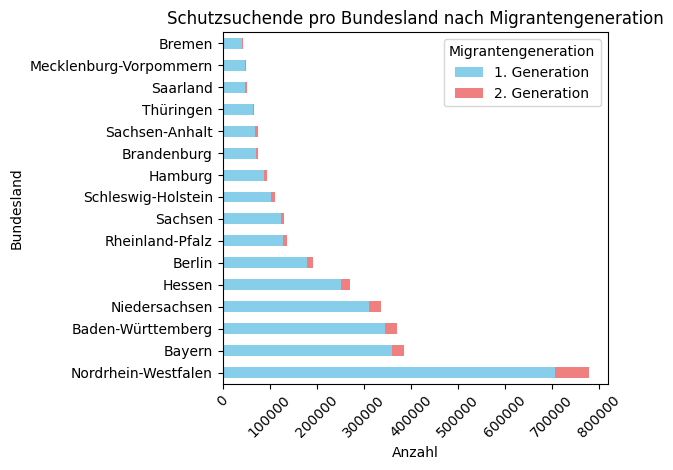

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Gruppieren nach Bundesland und migrantengeneration_code, dann aufsummieren
bundesland_migration = schutzsuchende_gesamt.groupby(["Bundesland", "Migrantengeneration_Code"])["Anzahl"].sum().unstack(fill_value=0)

# Gesamtsumme pro Bundesland berechnen und nach dieser sortieren
bundesland_migration["Gesamtsumme"] = bundesland_migration.sum(axis=1)
bundesland_migration = bundesland_migration.sort_values(by="Gesamtsumme", ascending=False)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Gestapeltes Balkendiagramm erstellen
ax = bundesland_migration.drop("Gesamtsumme", axis=1).plot(kind="barh", stacked=True, color=["skyblue", "lightcoral"])

# Achsentitel anpassen
plt.title("Schutzsuchende pro Bundesland nach Migrantengeneration")
plt.xlabel("Anzahl")
#plt.ylabel("Bundesland")

# Anpassung der Legende
plt.legend(title="Migrantengeneration", labels=["1. Generation", "2. Generation"])

# Beschriftungen rotieren
plt.xticks(rotation=45)  # X-Achsen-Beschriftungen um 45 Grad rotieren
plt.yticks(rotation=0)   # Y-Achsen-Beschriftungen (falls nötig, auf 0 Grad setzen)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

In [ ]:
# Schutzsuchende nach Ländergruppen
